<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Transformation-des-variables-qualitatives" data-toc-modified-id="Transformation-des-variables-qualitatives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Transformation des variables qualitatives</a></span></li><li><span><a href="#Les-outils" data-toc-modified-id="Les-outils-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Les outils</a></span><ul class="toc-item"><li><span><a href="#Les-Régressions" data-toc-modified-id="Les-Régressions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Les Régressions</a></span></li></ul></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#Régressions-sur-le-jeu-initial" data-toc-modified-id="Régressions-sur-le-jeu-initial-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Régressions sur le jeu initial</a></span><ul class="toc-item"><li><span><a href="#Les-performances-des-régresseurs" data-toc-modified-id="Les-performances-des-régresseurs-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Les performances des régresseurs</a></span></li></ul></li><li><span><a href="#ACP" data-toc-modified-id="ACP-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ACP</a></span></li><li><span><a href="#ACP-plus-les-traitements-des-variables-qualitatives" data-toc-modified-id="ACP-plus-les-traitements-des-variables-qualitatives-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ACP plus les traitements des variables qualitatives</a></span></li><li><span><a href="#ACP-plus-les-traitements-des-variables-qualitatives-et-distributions" data-toc-modified-id="ACP-plus-les-traitements-des-variables-qualitatives-et-distributions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>ACP plus les traitements des variables qualitatives et distributions</a></span></li><li><span><a href="#ACP-plus-les-traitements-des-variables-qualitatives-et-distributions-yeoJohn" data-toc-modified-id="ACP-plus-les-traitements-des-variables-qualitatives-et-distributions-yeoJohn-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>ACP plus les traitements des variables qualitatives et distributions yeoJohn</a></span></li><li><span><a href="#Traitement-de-variables-extrêmes" data-toc-modified-id="Traitement-de-variables-extrêmes-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Traitement de variables extrêmes</a></span></li></ul></div>

In [1]:
import time
import os, warnings
os.chdir(r"F:\Formation")

import pandas as pd
import seaborn as sns

%pylab inline

warnings.filterwarnings(action="ignore")
plt.style.use('seaborn-poster')
sns.set(font_scale=3)
np.random.seed(123456789)

Populating the interactive namespace from numpy and matplotlib


# Transformation des variables qualitatives

In [2]:
def createColumnsQualitatives(donnees,col):
    var = donnees[col].unique()
    var.sort()
    for i in donnees[col].unique():
        nom = col+'_'+str(i)
        donnees[nom] = donnees[col].apply(lambda x : 1 if x==i else 0)
    donnees.drop(labels=col, axis=1, inplace=True)

# Les outils

In [3]:
from sklearn.metrics import mean_absolute_error,median_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

In [4]:
def getMetrics(val_reels, val_predites):
    correlations = pd.DataFrame(list(zip(val_predites,val_reels)), columns=['predictions','valeurs'])
    return sqrt(mean_squared_error(val_reels, val_predites)),sqrt(abs(r2_score(val_reels, val_predites))),correlations.astype(float).corr().valeurs[0]   

In [5]:
def affichageMetricsAvecLog(val_reels, val_predites):
    print("Mean absolute error                 MAE   : %.6f" % mean_absolute_error(val_reels, val_predites))
    print("Median absolute error               MedAE : %.6f" % median_absolute_error(val_reels, val_predites))
    print("Mean squared error                  MSE   : %.6f" % mean_squared_error(val_reels, val_predites))
    print("Mean squared logarithmic error      MSLE  : %.6f" % mean_squared_log_error(val_reels, val_predites))
    print("Root mean squared error             RMSE  : %.6f" % sqrt(mean_squared_error(val_reels, val_predites)))
    print("Root mean squared logarithmic error RMSLE : %.6f" % sqrt(mean_squared_log_error(val_reels, val_predites)))
    print("R² score  raw_values                R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='raw_values'))
    print("R² score  uniform_average           R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='uniform_average'))
    print("R² score  variance_weighted         R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='variance_weighted'))
    print("R  score  raw_values                R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='raw_values'))))
    print("R  score  uniform_average           R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='uniform_average'))))
    print("R  score  variance_weighted         R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='variance_weighted'))))
    correlations = pd.DataFrame(list(zip(val_predites,val_reels)), columns=['predictions','valeurs'])
    sns.set(font_scale=3)
    plt.figure(figsize=(26,26))
    plt.title('Correlation Pearson des variables', y=1.05, size=38)
    sns.heatmap(correlations.astype(float).corr(),linewidths=0.3,vmax=1.0,fmt ="1.9f", 
                square=True, cmap='coolwarm', linecolor='white', annot=True)
    plt.show() 
    
    plt.figure(figsize=(26,26))
    plt.scatter(correlations.valeurs,correlations.predictions, alpha=0.4, s=200, c='black', edgecolors='white')
    plt.scatter(correlations.valeurs,correlations.predictions, alpha=0.3, 
                s=200+abs(correlations.valeurs - correlations.predictions)*100, c='red', edgecolors='black')
    plt.plot((correlations.valeurs.min(), correlations.valeurs.max()), 
             (correlations.valeurs.min(), correlations.valeurs.max()), c='black', ls="--", alpha=0.6) 
    plt.xlabel('valeurs')
    plt.ylabel('predictions')
    plt.show()    
    
    sns.jointplot(x='valeurs',y='predictions',data=correlations, kind='reg', size=25)

In [6]:
def affichageMetricsSansLog(val_reels, val_predites):
    print("Mean absolute error                 MAE   : %.6f" % mean_absolute_error(val_reels, val_predites))
    print("Median absolute error               MedAE : %.6f" % median_absolute_error(val_reels, val_predites))
    print("Mean squared error                  MSE   : %.6f" % mean_squared_error(val_reels, val_predites))
    #print("Mean squared logarithmic error      MSLE  : %.6f" % mean_squared_log_error(val_reels, val_predites))
    print("Root mean squared error             RMSE  : %.6f" % sqrt(mean_squared_error(val_reels, val_predites)))
    #print("Root mean squared logarithmic error RMSLE : %.6f" % sqrt(mean_squared_log_error(val_reels, val_predites)))
    print("R² score  raw_values                R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='raw_values'))
    print("R² score  uniform_average           R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='uniform_average'))
    print("R² score  variance_weighted         R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='variance_weighted'))
    print("R  score  raw_values                R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='raw_values'))))
    print("R  score  uniform_average           R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='uniform_average'))))
    print("R  score  variance_weighted         R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='variance_weighted'))))
    correlations = pd.DataFrame(list(zip(val_predites,val_reels)), columns=['predictions','valeurs'])
    sns.set(font_scale=3)
    plt.figure(figsize=(26,26))
    plt.title('Correlation Pearson des variables', y=1.05, size=38)
    sns.heatmap(correlations.astype(float).corr(),linewidths=0.3,vmax=1.0,fmt ="1.9f", 
                square=True, cmap='coolwarm', linecolor='white', annot=True)
    plt.show()    
    plt.figure(figsize=(26,26))
    plt.scatter(correlations.valeurs,correlations.predictions, alpha=0.4, s=200, c='black', edgecolors='white')
    plt.scatter(correlations.valeurs,correlations.predictions, alpha=0.3, 
                s=200+abs(correlations.valeurs - correlations.predictions)*100, c='red', edgecolors='black')
    plt.plot((correlations.valeurs.min(), correlations.valeurs.max()), 
             (correlations.valeurs.min(), correlations.valeurs.max()), c='black', ls="--", alpha=0.6) 
    plt.xlabel('valeurs')
    plt.ylabel('predictions')
    plt.show()   
    
    sns.jointplot(x='valeurs',y='predictions',data=correlations, kind='reg', size=25)

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.figure(figsize=(26,26))    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)     

In [8]:
def afficheDistributions(donnees):
    for i in donnees.columns:
        plt.title('distribution %s' % i)
        donnees[i].hist(figsize=(16,14),bins=50, color='navy',edgecolor='white')
        plt.show()    

## Les Régressions

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,BayesianRidge
from sklearn.linear_model import RANSACRegressor,ARDRegression,OrthogonalMatchingPursuit
from sklearn.linear_model import SGDRegressor,TheilSenRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import LinearSVR,SVR
from sklearn.neural_network import MLPRegressor

def calculRegressions(X_train, X_test, y_train, y_test):
    rmse,r,p = dict(),dict(),dict()
    
    yRegressions = pd.DataFrame()
    yRegressions['Observations']=y_test

    noms = ["LinearRegression",
            "PolynomialRegression2",
            "PolynomialRegression3",
            "PolynomialRegression4",
            "BayesianRidge",
            "MLPRegressor",
            "LinearSVR",
            "SVR_linear",
            "SVR_rbf",
            "SVR_poly2",# "SVR_poly3","SVR_poly4",
            #"SVR_sigmoid",
            "RandomForestRegressor",
            "GradientBoostingRegressor"]

    regresseurs = [
        LinearRegression(),
        #make_pipeline(PolynomialFeatures(2), Ridge()),
        make_pipeline(PolynomialFeatures(2), LinearRegression()),

        make_pipeline(PolynomialFeatures(3), Ridge()),
        make_pipeline(PolynomialFeatures(4), Ridge()),
        BayesianRidge(alpha_1=1.0e-7),
        MLPRegressor(alpha=0.0001, hidden_layer_sizes = (100,), max_iter = 5000, 
                     activation = 'logistic', learning_rate = 'adaptive'),
        LinearSVR(C=1),
        SVR(kernel='linear', C=0.001),
        SVR(kernel='rbf', C=1e3, gamma=0.0001),
        SVR(kernel='poly', degree=2, C=0.001),
        #SVR(kernel='poly', degree=3),
        #SVR(kernel='poly', degree=4),
        #SVR(kernel='sigmoid'),
        RandomForestRegressor(max_depth=4, n_estimators=500),
        GradientBoostingRegressor(loss='quantile', alpha=0.95,
                                    n_estimators=500, max_depth=3,
                                    learning_rate=.1, min_samples_leaf=9,
                                    min_samples_split=9)   ]

    for nom, reg in zip(noms, regresseurs):
        t1 = time.time()  
        yRegressions[nom] = reg.fit(X_train, y_train).predict(X_test)
        rmse[nom],r[nom],p[nom] = getMetrics(y_test, yRegressions[nom])
        print('Exécution  '+nom.ljust(30)+(': %.2fs' % (time.time() - t1)).lstrip('0')+('  p = %.12f' % p[nom]).lstrip('0'))

    resultats = pd.DataFrame(pd.Series(rmse),columns=["RMSE"])
    resultats["R"] = pd.Series(r)
    resultats["Pearson"] = pd.Series(p)
    resultats.sort_values(by='Pearson',ascending=False, inplace=True)
    return resultats,yRegressions , regresseurs

In [10]:
 donnees = pd.read_csv(r"F:\GitHub\FormationML\Regression\Trasnfo_Addx_HS_Long.DAT",sep='\t', index_col='ID')

In [11]:
donnees.head()

,ouverture,angle,angle.1,ouverture.1
ID,,,,
1,43.8,0.000000,0.0,43.768432
2,43.9,0.400738,0.1,43.778540
3,44.0,0.872864,0.2,43.798784
4,44.1,1.325690,0.3,43.819210
5,44.2,1.762315,0.4,43.839835


In [12]:
donnees.sort_values('ouverture')

,ouverture,angle,angle.1,ouverture.1
ID,,,,
1,43.8,0.000000,0.0,43.768432
2,43.9,0.400738,0.1,43.778540
3,44.0,0.872864,0.2,43.798784
4,44.1,1.325690,0.3,43.819210
5,44.2,1.762315,0.4,43.839835
...,...,...,...,...
3239,367.6,212.203177,NaN,NaN
3240,367.7,212.358933,NaN,NaN
3241,367.8,212.514690,NaN,NaN


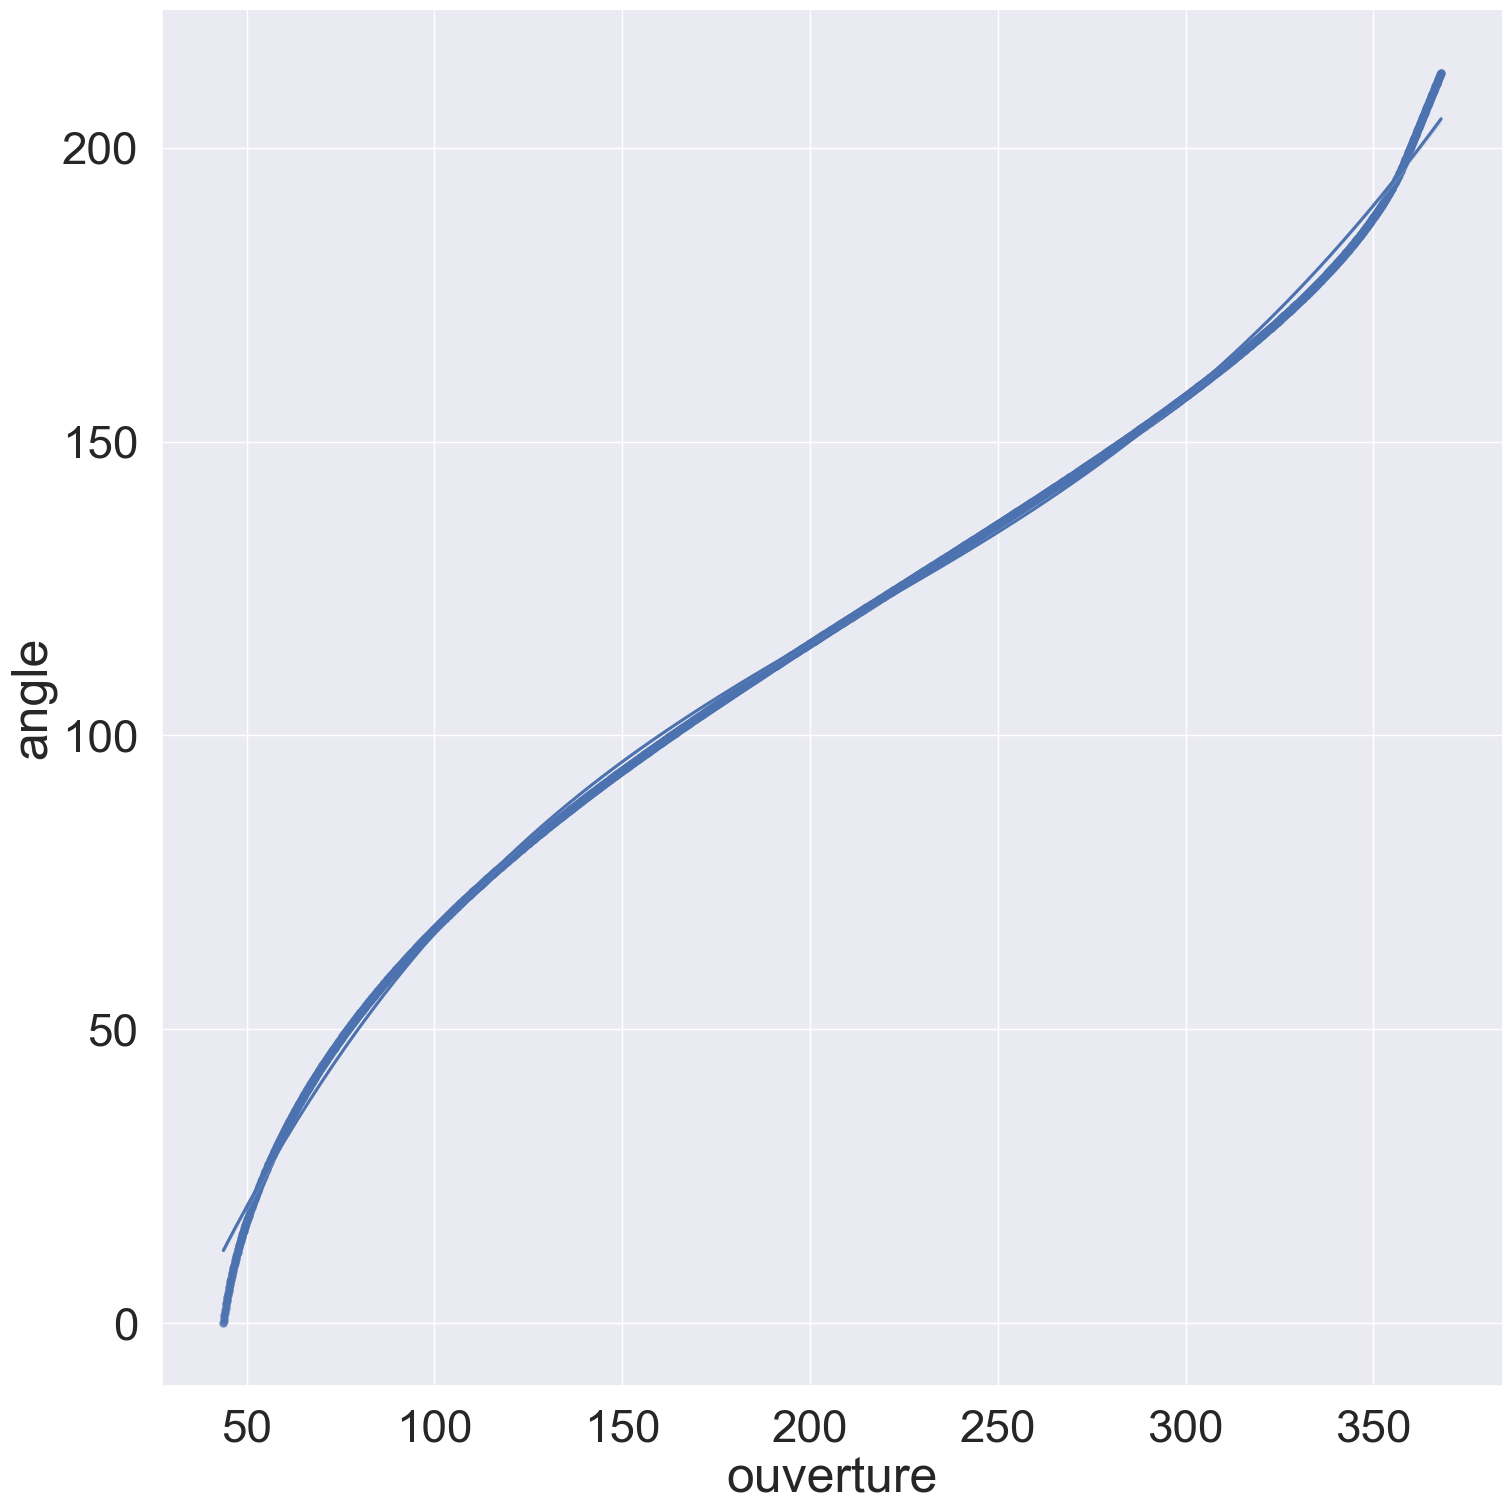

In [13]:
import seaborn as sns
sns.lmplot(x="ouverture", y="angle", data=donnees,order=4,  size =16)

In [14]:
donnees['constante'] = 0

X= donnees[['ouverture','constante']]
y= donnees.angle

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Régressions sur le jeu initial

In [16]:
resultats,yRegressions,regLin = calculRegressions(X_train, X_test, y_train, y_test)

Exécution  LinearRegression              : 0.02s  p = 0.990829838512
Exécution  PolynomialRegression2         : 0.00s  p = 0.992625780989
Exécution  PolynomialRegression3         : 0.02s  p = 0.999275332819
Exécution  PolynomialRegression4         : 0.01s  p = 0.999325845482
Exécution  BayesianRidge                 : 0.01s  p = 0.990829838512
Exécution  MLPRegressor                  : 6.07s  p = 0.997432967178
Exécution  LinearSVR                     : 0.05s  p = 0.990829838512
Exécution  SVR_linear                    : 0.30s  p = 0.990829838512
Exécution  SVR_rbf                       : 3.79s  p = 0.999955647830
Exécution  SVR_poly2                     : 0.20s  p = 0.958375691099
Exécution  RandomForestRegressor         : 0.69s  p = 0.998705794889
Exécution  GradientBoostingRegressor     : 0.95s  p = 0.993014476696


In [17]:
resultats

,RMSE,R,Pearson
SVR_rbf,0.454839,0.999955,0.999956
PolynomialRegression4,1.759227,0.999321,0.999326
PolynomialRegression3,1.822920,0.999270,0.999275
RandomForestRegressor,2.431890,0.998701,0.998706
MLPRegressor,3.426954,0.997419,0.997433
GradientBoostingRegressor,6.375999,0.991038,0.993014
PolynomialRegression2,5.786554,0.992624,0.992626
SVR_linear,7.634219,0.987126,0.990830
LinearSVR,8.821767,0.982772,0.990830
LinearRegression,6.451279,0.990824,0.990830


Mean absolute error                 MAE   : 0.181030
Median absolute error               MedAE : 0.094145
Mean squared error                  MSE   : 0.206879
Root mean squared error             RMSE  : 0.454839
R² score  raw_values                R²    : 0.999909
R² score  uniform_average           R²    : 0.999909
R² score  variance_weighted         R²    : 0.999909
R  score  raw_values                R     : 0.999955
R  score  uniform_average           R     : 0.999955
R  score  variance_weighted         R     : 0.999955


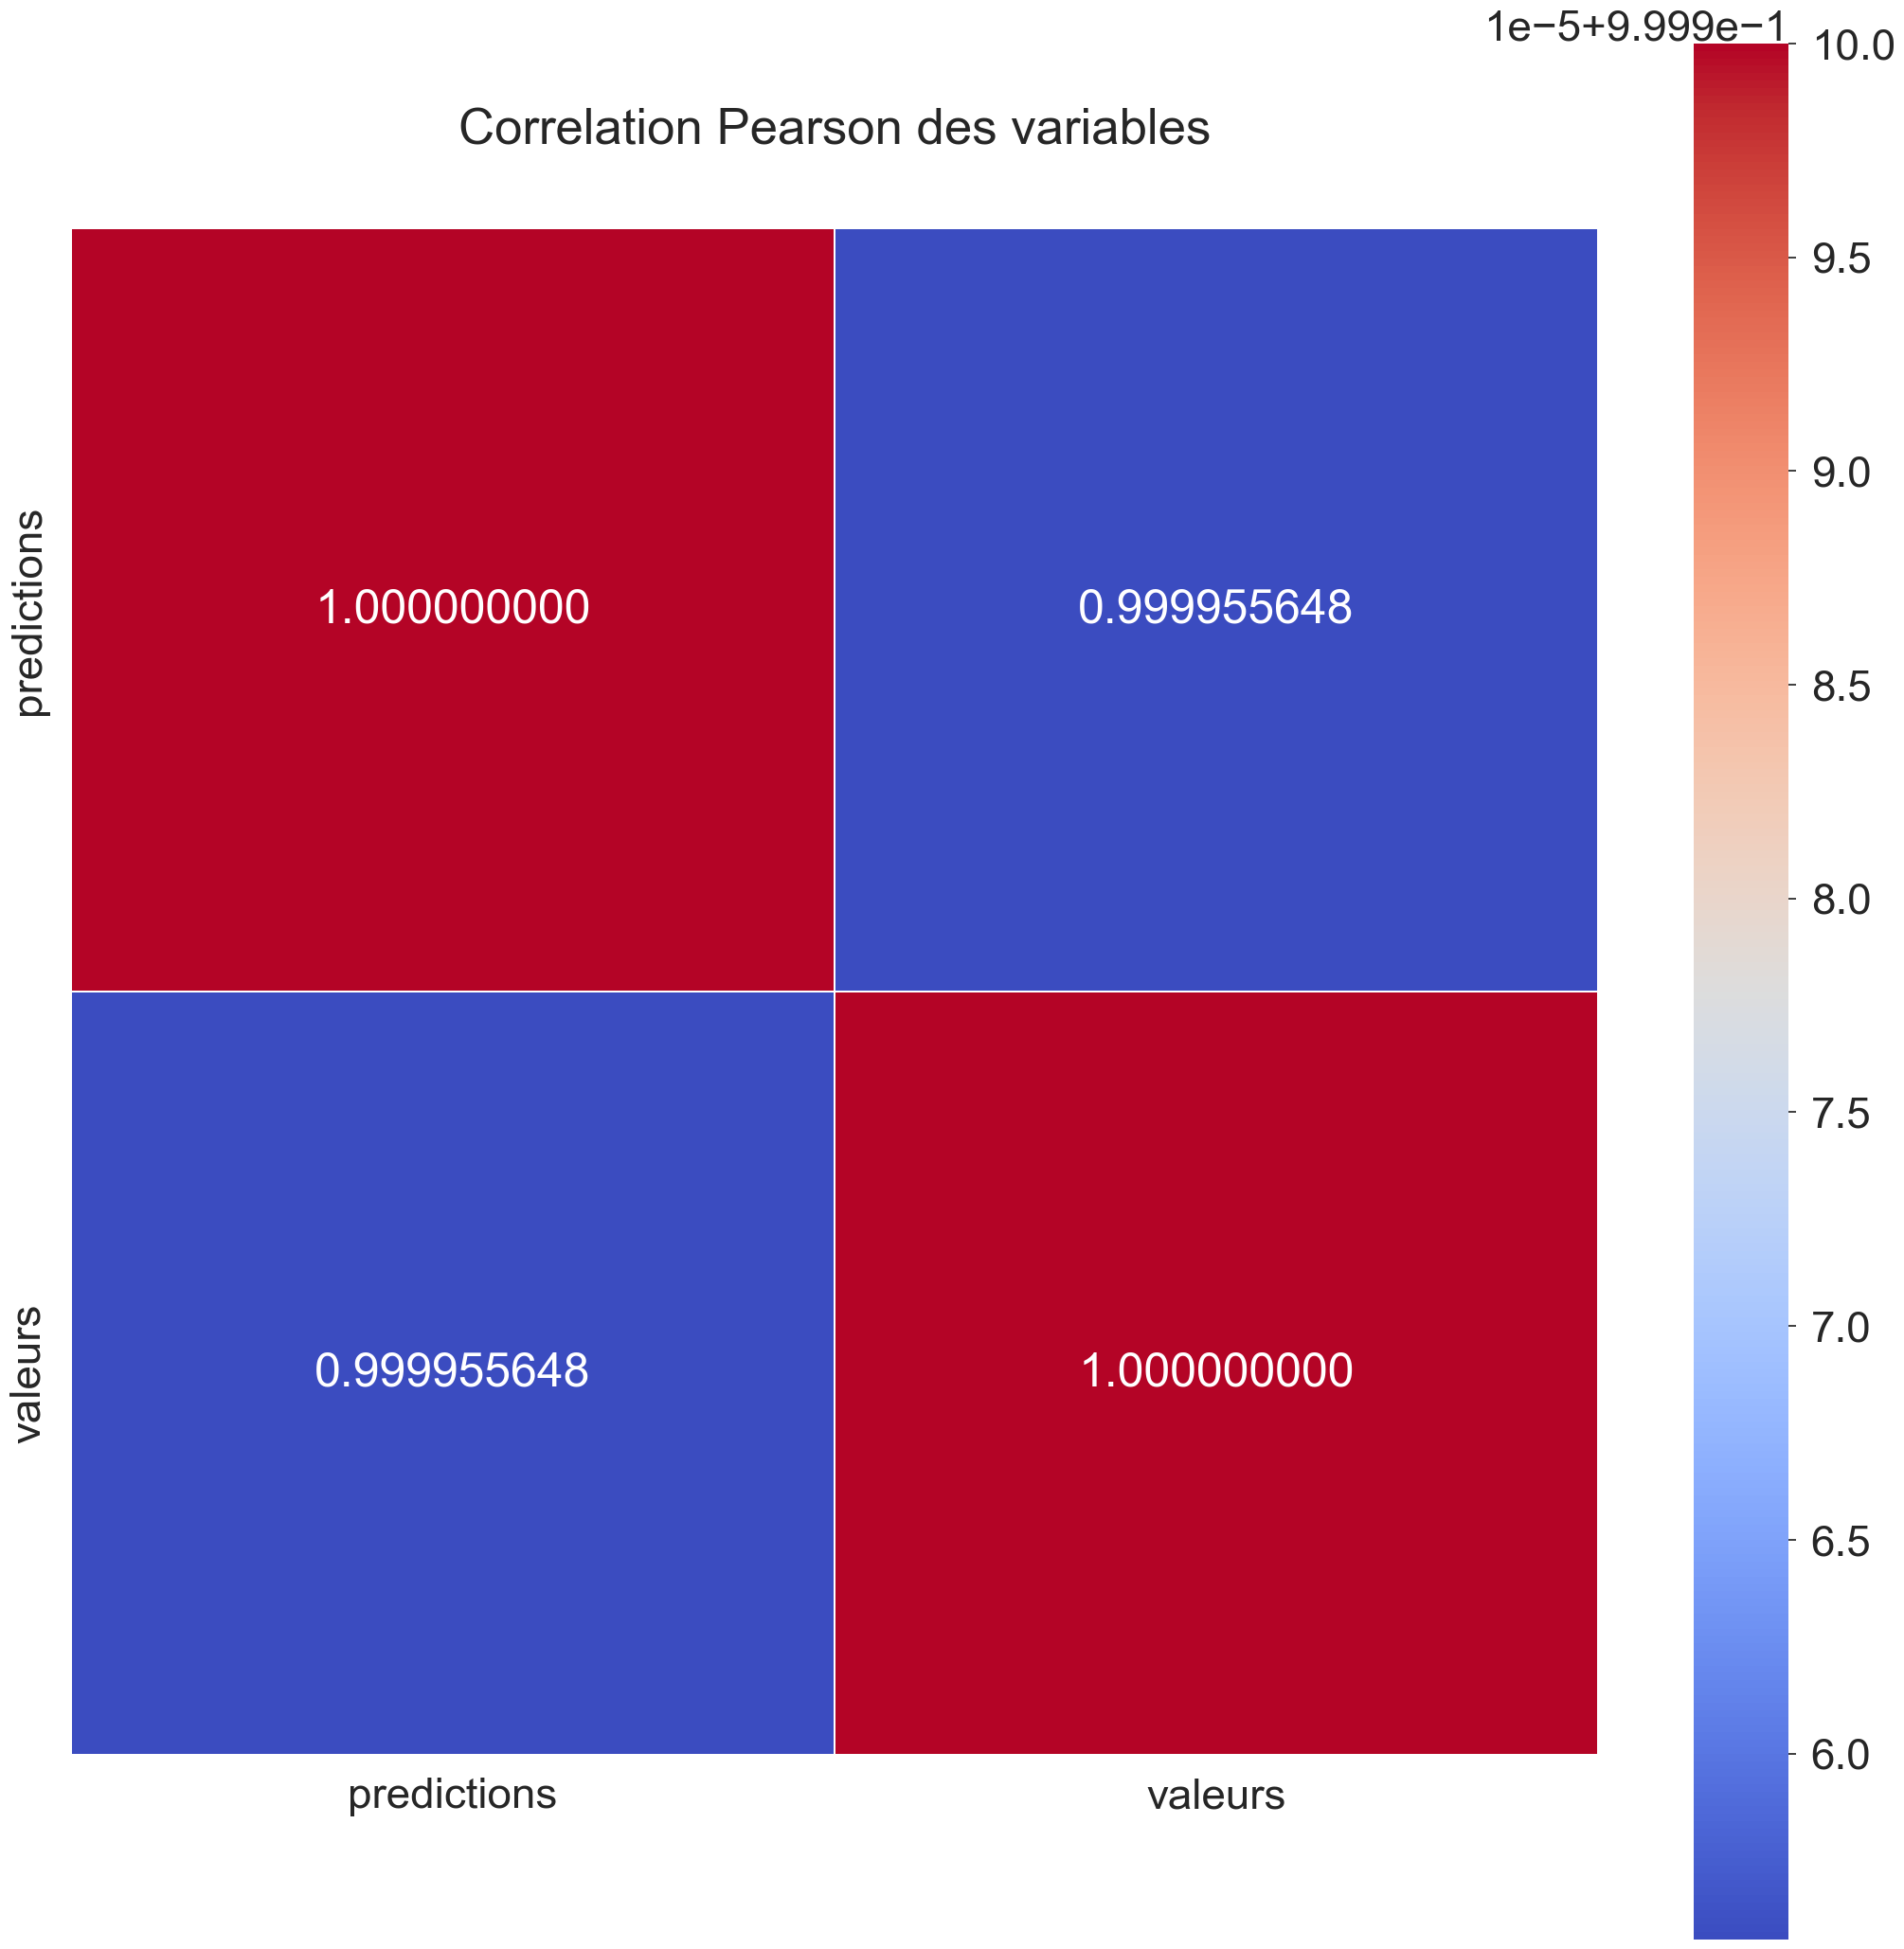

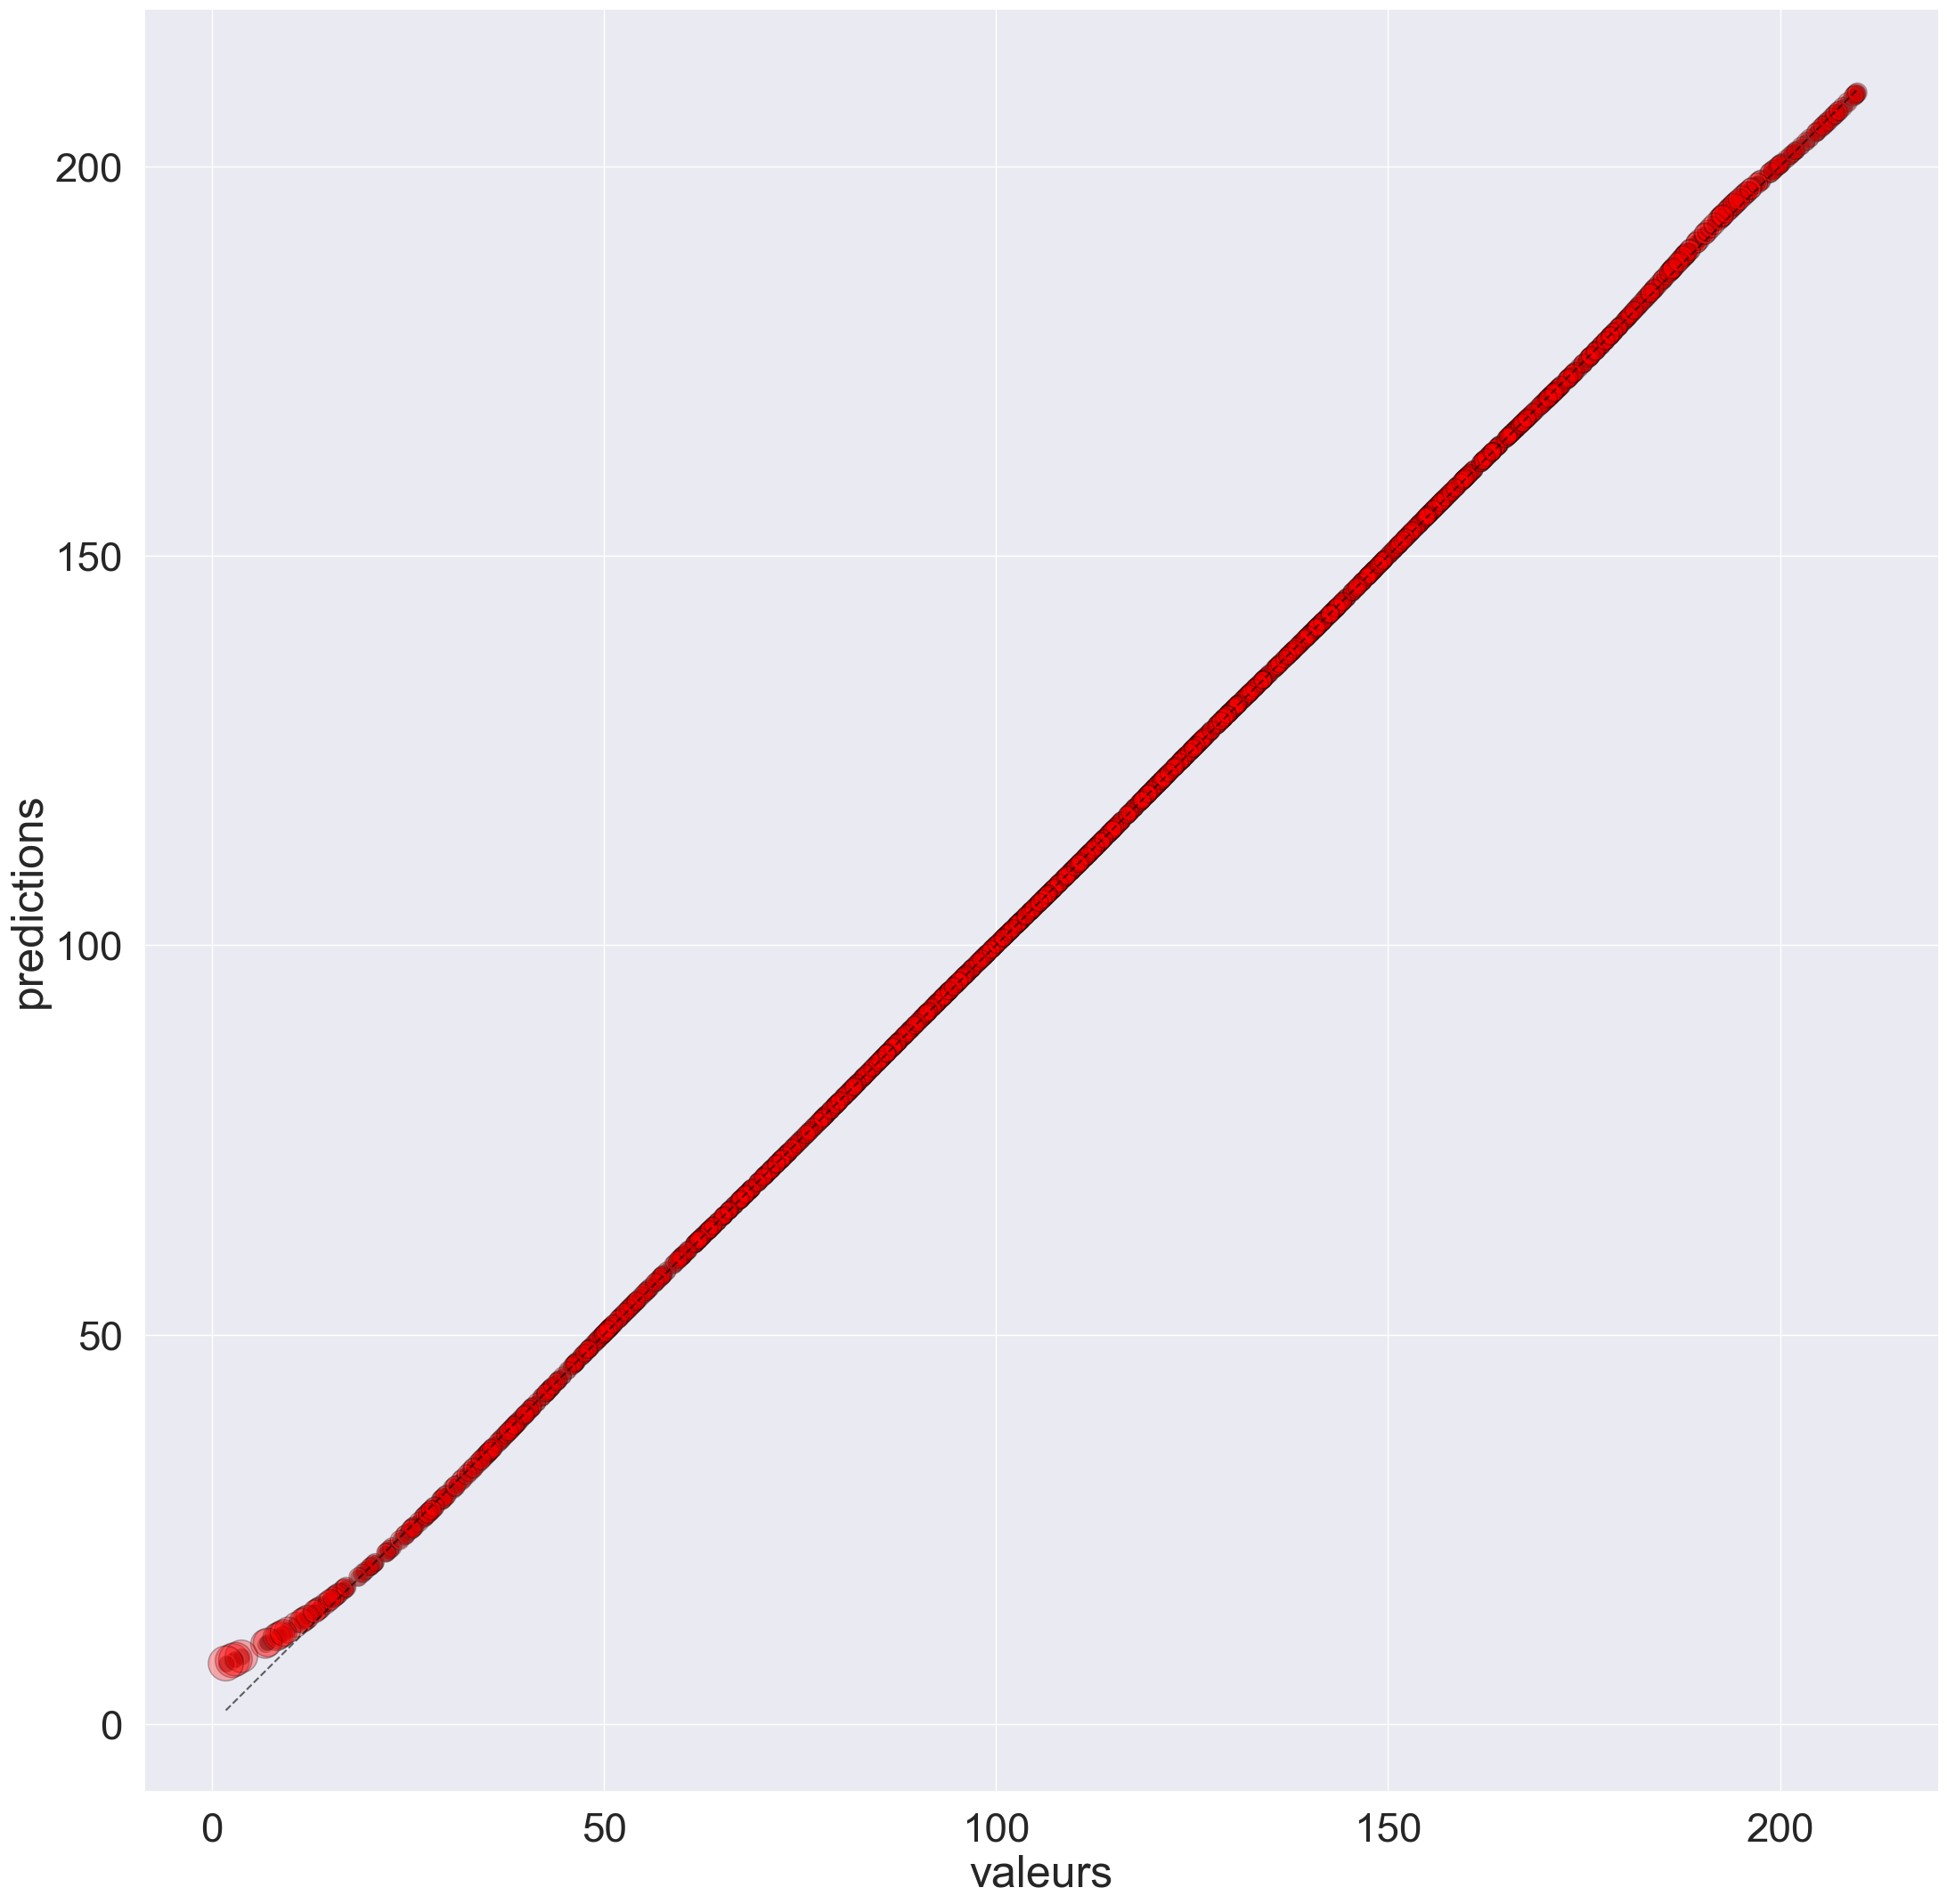

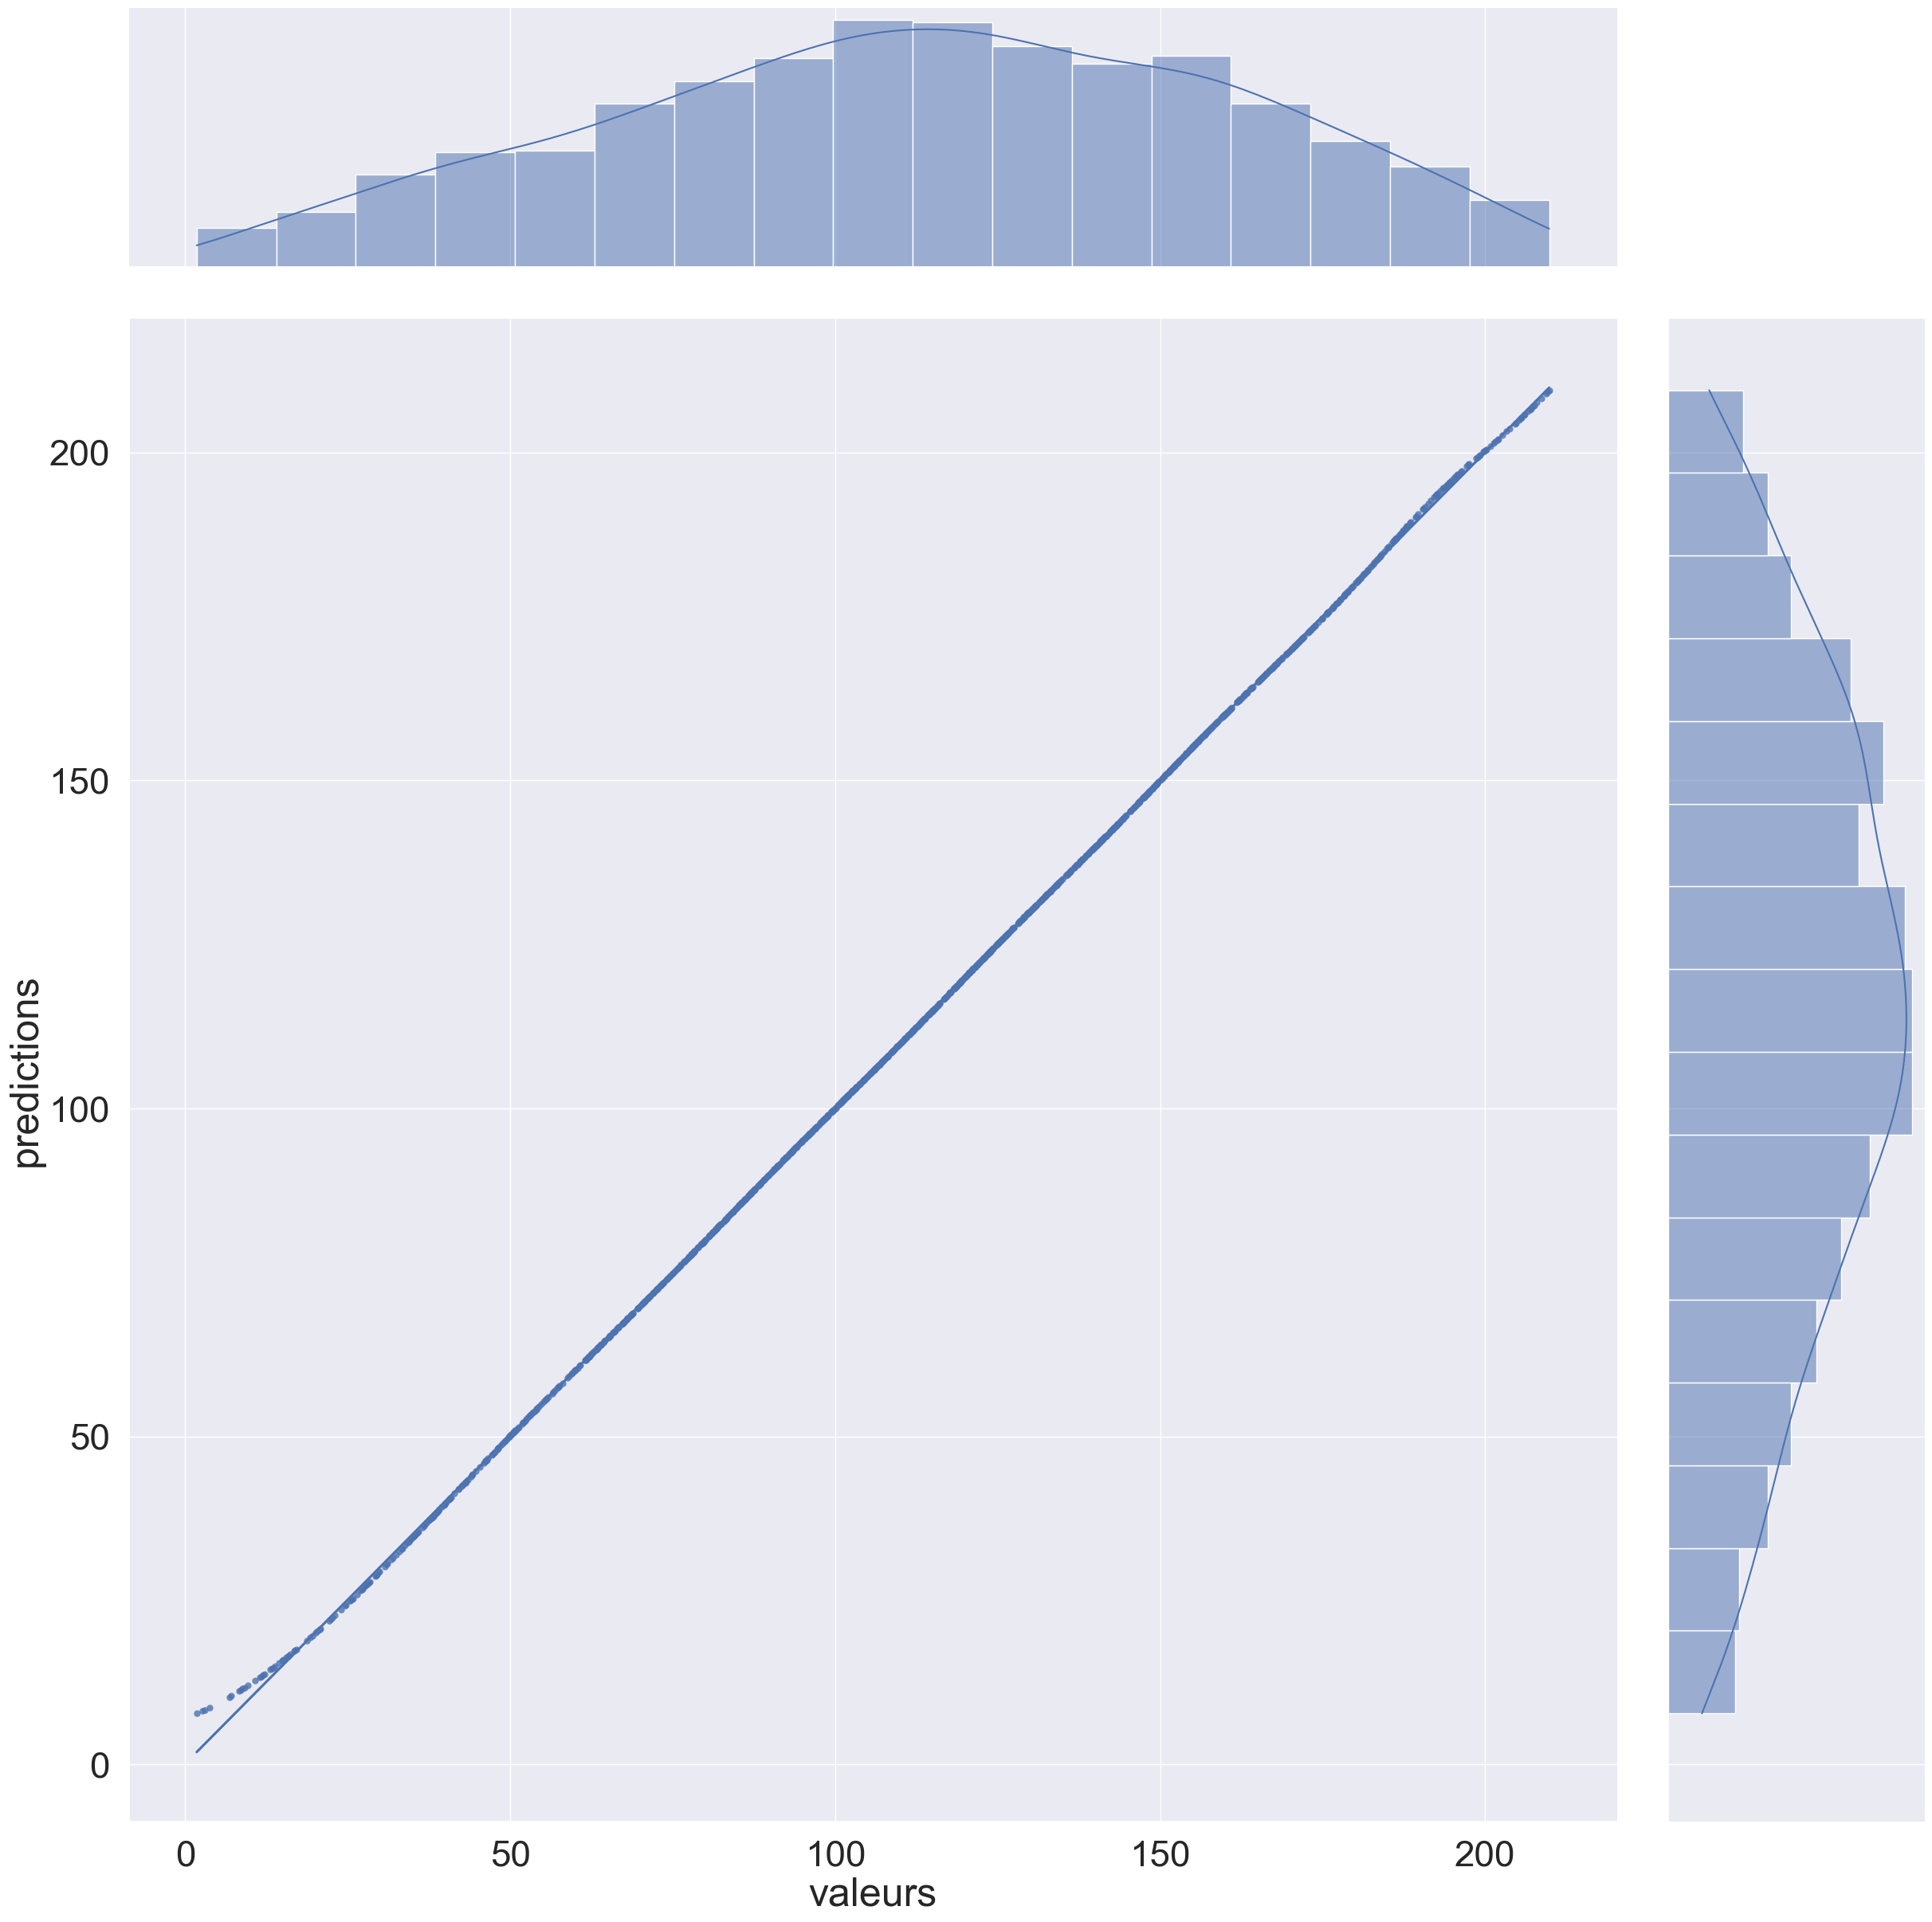

In [18]:
affichageMetricsSansLog(yRegressions.Observations, yRegressions.SVR_rbf)